# Python packages for graph analysis

In [1]:
pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import networkx as nx
import pandas as pd
from pandas import DataFrame, Series
import numpy as np 

# Dataset: Data Science for COVID-19 in South Korea(DS4C)

In [3]:
from google.colab import drive
drive.mount('/content/drive')   

Mounted at /content/drive


In [5]:
#load dataset
df = pd.read_csv('/content/drive/MyDrive/3-1/데이터마이닝/LAB2/archive/PatientInfo.csv', dtype={'patient_id':str, 'infected_by':str})

In [8]:
 print(df.shape)
 df.head(10)

(5165, 14)


,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
5,1000000006,female,50s,Korea,Seoul,Jongno-gu,contact with patient,1000000003,43,NaN,2020-01-31,2020-02-19,NaN,released
6,1000000007,male,20s,Korea,Seoul,Jongno-gu,contact with patient,1000000003,0,NaN,2020-01-31,2020-02-10,NaN,released
7,1000000008,male,20s,Korea,Seoul,etc,overseas inflow,NaN,0,NaN,2020-02-02,2020-02-24,NaN,released
8,1000000009,male,30s,Korea,Seoul,Songpa-gu,overseas inflow,NaN,68,NaN,2020-02-05,2020-02-21,NaN,released
9,1000000010,female,60s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000003,6,NaN,2020-02-05,2020-02-29,NaN,released


## Create a directed graph


*   nodes: 환자 (patient)
*   edges: 감염 방향 (infected_by -> patient_id)



In [7]:
g = nx.DiGraph(df.loc[:, ('infected_by', 'patient_id')].dropna().values.tolist()) # edge = [(vs_id, vs_id)]

In [9]:
list(g.nodes)[:10]

['2002000001',
 '1000000003',
 '1000000002',
 '1000000005',
 '1000000006',
 '1000000007',
 '1000000010',
 '1000000017',
 '1000000013',
 '1000000014']

In [10]:
list(g.edges)[:10]

[('2002000001', '1000000003'),
 ('1000000003', '1000000006'),
 ('1000000003', '1000000007'),
 ('1000000003', '1000000010'),
 ('1000000003', '1000000017'),
 ('1000000002', '1000000005'),
 ('1000000017', '1000000013'),
 ('1000000017', '1000000016'),
 ('1000000013', '1000000014'),
 ('1000000014', '2000000019')]

In [11]:
len(g.nodes)

1717

In [12]:
len(g.edges)

1346



*   Accessing neighbors and edges



In [ ]:
g.degree() # dictonary = {key(node): value(degree)}

In [ ]:
g.in_degree()

In [ ]:
g.out_degree()

In [16]:
g.out_degree()['1000000003']

4

## Adding attributes to nodes, and edges

### Node Attributes

In [17]:
g.nodes['1000000003']['age'] = '50s'

In [ ]:
g.nodes.data()

In [18]:
#nx.set_node_attributes(G, values(scalar value or dict-like), name)
#그래프 G의 모든 노드에 {name: value} 추가
nx.set_node_attributes(g, df.set_index('patient_id')['age'], 'age') 

In [ ]:
list(g.nodes.data())

### Edge Attributes

In [30]:
g.edges['2002000001', '1000000003']['infected_case'] = 'contact with patient'

In [ ]:
g.edges.data()

In [32]:
nx.set_edge_attributes(g,df.set_index(['infected_by', 'patient_id'])['infection_case'], 'infection_case ') #{(1,3): value}
#df.set_index((column_name1)[column_name2]) -> dictonary = {column_name: column_name2}

In [ ]:
g.edges.data()

## Analyze a graph

In [34]:
def viewer(_dict_data, col_name):
  result = pd.DataFrame().from_dict(_dict_data, orient='index', columns=[col_name])
  return df.set_index('patient_id').join(result, how='right').sort_values(col_name, ascending=False).head(10)

### Page Rank

In [ ]:
pagerank = nx.pagerank(g)
pagerank

In [43]:
pagerank = viewer(pagerank, 'pagerank')
pagerank

,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,pagerank
4100000070,male,10s,Korea,Chungcheongnam-do,Cheonan-si,contact with patient,4100000052,0,NaN,2020-03-01,2020-03-18,NaN,released,0.0024
1500000043,male,10s,Korea,Daejeon,Yuseong-gu,overseas inflow,1500000042,1,NaN,2020-05-11,2020-05-27,NaN,released,0.0024
4100000116,male,60s,Korea,Chungcheongnam-do,Hongseong-gun,overseas inflow,4100000118,0,2020-03-16,2020-03-17,2020-04-03,NaN,released,0.0024
2000000854,NaN,NaN,Korea,Gyeonggi-do,Suwon-si,contact with patient,2000000854,NaN,NaN,2020-06-01,NaN,NaN,isolated,0.0024
6009000008,female,60s,Korea,Gyeongsangbuk-do,Sangju-si,contact with patient,6009000007,NaN,NaN,2020-02-26,2020-03-18,NaN,released,0.0024
1500000042,male,10s,Korea,Daejeon,Yuseong-gu,overseas inflow,1500000043,1,NaN,2020-05-11,2020-05-27,NaN,released,0.0024
4100000118,female,60s,Korea,Chungcheongnam-do,Hongseong-gun,overseas inflow,4100000116,5,NaN,2020-03-17,2020-04-15,NaN,released,0.0024
4100000052,female,40s,Korea,Chungcheongnam-do,Cheonan-si,contact with patient,4100000070,7,2020-02-24,2020-02-29,2020-03-18,NaN,released,0.0024
6009000007,male,70s,Korea,Gyeongsangbuk-do,Sangju-si,contact with patient,6009000008,NaN,NaN,2020-02-26,2020-03-17,NaN,released,0.0024
1100000028,female,60s,Korea,Busan,Suyeong-gu,contact with patient,1100000028,8,2020-02-22,2020-02-23,NaN,NaN,released,0.0024


### Node Centrality


*   degree centrality: 연결된 node가 많을수록 크다.
*   closeness centrality: 모든 node와의 거리가 가까울수록 크다.
*   betweenness centrality: 노드 간의 경로에 위치해 있을수록 크다.
*   eigenvector centrality: 큰 네트워크와 연결되어 있을수록 크다.



In [37]:
 degree_centrality = nx.degree_centrality(g)
 degree_centrality = viewer(degree_centrality, 'degree_centrality')
 degree_centrality

,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,degree_centrality
2000000205,female,70s,Korea,Gyeonggi-do,Seongnam-si,contact with patient,1000000138,8,NaN,2020-03-14,NaN,NaN,isolated,0.030303
4100000008,female,40s,Korea,Chungcheongnam-do,Cheonan-si,gym facility in Cheonan,NaN,130,2020-02-20,2020-02-26,2020-03-29,NaN,released,0.015734
2000000167,female,40s,Korea,Gyeonggi-do,Bucheon-si,contact with patient,1000000125,NaN,NaN,2020-03-10,NaN,NaN,isolated,0.014569
1400000209,female,NaN,Korea,Incheon,Bupyeong-gu,contact with patient,NaN,NaN,NaN,2020-05-31,NaN,NaN,isolated,0.013986
4100000006,female,40s,Korea,Chungcheongnam-do,Asan-si,contact with patient,4100000007,41,2020-02-22,2020-02-26,2020-03-22,NaN,released,0.012821
2000000309,female,80s,Korea,Gyeonggi-do,Gunpo-si,etc,NaN,NaN,2020-03-18,2020-03-19,NaN,NaN,isolated,0.012238
1000000125,female,50s,Korea,Seoul,Nowon-gu,Guro-gu Call Center,NaN,NaN,NaN,2020-03-08,NaN,NaN,released,0.010490
2000000508,female,40s,Korea,Gyeonggi-do,Pyeongtaek-si,overseas inflow,NaN,NaN,NaN,2020-04-01,NaN,NaN,isolated,0.009907
1200000031,female,60s,Korea,Daegu,NaN,Shincheonji Church,NaN,1160,NaN,2020-02-18,NaN,NaN,isolated,0.009907
2000001153,NaN,NaN,Korea,Gyeonggi-do,Gunpo-si,etc,NaN,NaN,2020-06-23,2020-06-26,NaN,NaN,isolated,0.008741


In [38]:
 closeness_centrality = nx.closeness_centrality(g)
 closeness_centrality = viewer(closeness_centrality, 'closeness_centrality')
 closeness_centrality

,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,closeness_centrality
6016000044,male,40s,Korea,Gyeongsangbuk-do,Yecheon-gun,contact with patient,6016000038,NaN,NaN,2020-05-01,NaN,NaN,isolated,0.001020
1400000261,female,NaN,Korea,Incheon,Yeonsu-gu,contact with patient,1400000259,NaN,NaN,2020-06-04,NaN,NaN,isolated,0.000999
6016000038,female,0s,Korea,Gyeongsangbuk-do,Yecheon-gun,contact with patient,6016000032,NaN,NaN,2020-04-17,NaN,NaN,isolated,0.000999
6016000035,female,30s,Korea,Gyeongsangbuk-do,Yecheon-gun,contact with patient,6016000032,NaN,NaN,2020-04-15,NaN,NaN,isolated,0.000999
6016000033,female,40s,Korea,Gyeongsangbuk-do,Yecheon-gun,contact with patient,6016000028,NaN,NaN,2020-04-15,NaN,NaN,isolated,0.000971
2000000746,female,50s,Korea,Gyeonggi-do,Seongnam-si,contact with patient,2000000736,NaN,NaN,2020-05-22,NaN,NaN,isolated,0.000971
2000000019,male,60s,Korea,Gyeonggi-do,Anyang-si,contact with patient,1000000014,32,NaN,2020-02-22,NaN,NaN,isolated,0.000971
1400000259,female,NaN,Korea,Incheon,Yeonsu-gu,contact with patient,1400000255,NaN,NaN,2020-06-04,NaN,NaN,isolated,0.000971
1000000019,female,70s,Korea,Seoul,Jongno-gu,contact with patient,1000000021,NaN,NaN,2020-02-20,2020-03-08,NaN,released,0.000971
6016000032,female,0s,Korea,Gyeongsangbuk-do,Yecheon-gun,contact with patient,6016000028,NaN,NaN,2020-04-15,NaN,NaN,isolated,0.000971


In [39]:
 betweenness_centrality = nx.betweenness_centrality(g, normalized=True)
 betweenness_centrality = viewer(betweenness_centrality, 'betweenness_centrality')
 betweenness_centrality

,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,betweenness_centrality
2000000205,female,70s,Korea,Gyeonggi-do,Seongnam-si,contact with patient,1000000138,8,NaN,2020-03-14,NaN,NaN,isolated,0.000020
4100000006,female,40s,Korea,Chungcheongnam-do,Asan-si,contact with patient,4100000007,41,2020-02-22,2020-02-26,2020-03-22,NaN,released,0.000011
2000000167,female,40s,Korea,Gyeonggi-do,Bucheon-si,contact with patient,1000000125,NaN,NaN,2020-03-10,NaN,NaN,isolated,0.000009
1400000240,female,NaN,Korea,Incheon,Michuhol-gu,contact with patient,1400000213,NaN,NaN,2020-06-01,NaN,NaN,isolated,0.000009
6016000019,male,10s,Korea,Gyeongsangbuk-do,Yecheon-gun,contact with patient,6016000012,NaN,NaN,2020-04-12,NaN,NaN,isolated,0.000008
6016000009,male,10s,Korea,Gyeongsangbuk-do,Yecheon-gun,contact with patient,6016000007,NaN,NaN,2020-04-09,NaN,NaN,isolated,0.000008
1400000128,male,NaN,Korea,Incheon,Michuhol-gu,contact with patient,1400000119,NaN,NaN,2020-05-19,NaN,NaN,isolated,0.000007
6016000012,male,20s,Korea,Gyeongsangbuk-do,Yecheon-gun,contact with patient,6016000009,NaN,NaN,2020-04-10,NaN,NaN,isolated,0.000007
6016000028,female,40s,Korea,Gyeongsangbuk-do,Yecheon-gun,contact with patient,6016000019,NaN,NaN,2020-04-14,NaN,NaN,isolated,0.000007
4100000059,female,40s,Korea,Chungcheongnam-do,Cheonan-si,contact with patient,4100000006,0,NaN,2020-02-29,2020-03-18,NaN,released,0.000006


In [40]:
 eigenvector_centrality = nx.eigenvector_centrality(g)
 eigenvector_centrality = viewer(eigenvector_centrality, 'eigenvector_centrality')
 eigenvector_centrality

,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,eigenvector_centrality
4100000082,female,50s,Korea,Chungcheongnam-do,Cheonan-si,contact with patient,4100000006,14,NaN,2020-03-03,2020-03-24,NaN,released,0.122169
4100000080,male,50s,Korea,Chungcheongnam-do,Cheonan-si,contact with patient,4100000074,0,NaN,2020-03-02,2020-03-26,NaN,released,0.122169
4100000061,male,10s,Korea,Chungcheongnam-do,Cheonan-si,contact with patient,4100000059,NaN,2020-02-25,2020-02-29,2020-03-12,NaN,released,0.122169
4100000063,female,40s,Korea,Chungcheongnam-do,Cheonan-si,contact with patient,4100000006,5,2020-02-22,2020-02-29,2020-03-22,NaN,released,0.122169
4100000069,female,40s,Korea,Chungcheongnam-do,Cheonan-si,contact with patient,4100000006,NaN,2020-02-29,2020-03-01,2020-03-24,NaN,released,0.122169
4100000070,male,10s,Korea,Chungcheongnam-do,Cheonan-si,contact with patient,4100000052,0,NaN,2020-03-01,2020-03-18,NaN,released,0.122169
4100000074,female,50s,Korea,Chungcheongnam-do,Cheonan-si,contact with patient,4100000006,14,NaN,2020-03-01,2020-03-27,NaN,released,0.122169
4100000075,female,20s,Korea,Chungcheongnam-do,Cheonan-si,contact with patient,4100000033,4,2020-02-29,2020-03-01,2020-03-16,NaN,released,0.122169
4100000020,female,40s,Korea,Chungcheongnam-do,Cheonan-si,contact with patient,4100000006,1,2020-02-21,2020-02-28,2020-03-22,NaN,released,0.122169
4100000086,female,30s,Korea,Chungcheongnam-do,Cheonan-si,contact with patient,4100000059,19,NaN,2020-03-05,2020-03-20,NaN,released,0.122169


### Community


*   Girvan_Newman algorithm for community detection
  *   Hierarhcical clustering based on edges betweenness
  *   Selecting number k of communities
      * Pick k so that modularity(a measure of how well a network is partitioned into communitites) at k is maximized



In [44]:
from networkx.algorithms import community
comp = community.girvan_newman(g)

In [45]:
communities = tuple(sorted(c) for c in next(comp))

In [46]:
for i, comm_nodes in enumerate(communities):
  print("Community {}th".format(i))
  print(comm_nodes, end ='\n')

Community 0th
['1000000003', '1000000006', '1000000007', '1000000010', '1000000013', '1000000014', '1000000016', '1000000017', '1000000019', '1000000021', '2000000019', '2002000001']
Community 1th
['1000000002', '1000000005']
Community 2th
['1000000015', '1000000020', '1000000078']
Community 3th
['1000000022', '1000000025', '1000000061']
Community 4th
['1000000028', '1000000029']
Community 5th
['1000000031', '1000000033', '1000000034', '1000000037', '1000000045', '1000000067']
Community 6th
['1000000040', '1000000117', '1500000002', '1500000003']
Community 7th
['1000000041', '1000000046']
Community 8th
['1000000053', '1000000054', '1000000059', '1000000060']
Community 9th
['1000000062', '2017000005']
Community 10th
['1000000047', '1000000064']
Community 11th
['1000000065', '1000000068']
Community 12th
['1000000111', '1000000113', '1000000119']
Community 13th
['1000000114', '1000000115', '1000000118']
Community 14th
['1000000120', '1000000121', '1000000126', '1000000128', '1000000129']


## Drawing graphs

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

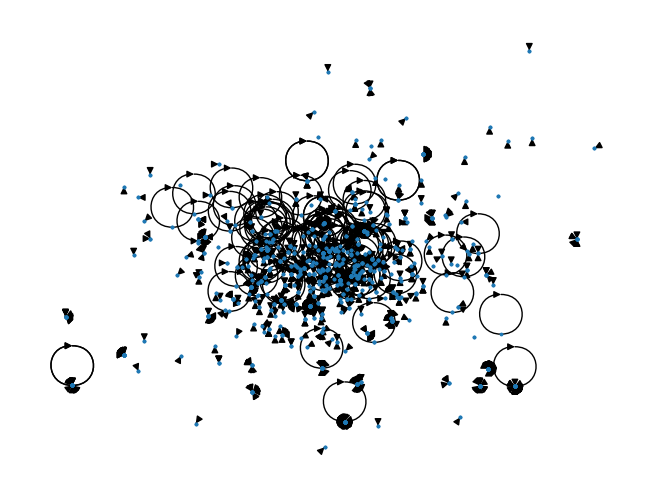

In [49]:
nx.draw(g, with_labels=False, pos=nx.spectral_layout(g), node_size=3)

In [50]:
nx.write_graphml_lxml(g, "ko_covid_graph.graphml")